#### Student informations (Max. 2 students) should be written in this cell (Student ID, Student Name).

Student 1:

Student 2: 

# HOMEWORK 1 - Linear and Polynomial Regression with direct (Least Squares) and iterative (Gradient Descent) optimization (For Only Training)

Regression analysis is widely used for inspecting multi-factor data. Its convenience arises from the logically structured approach of employing an equation to establish the connection between a variable of interest (the response) and a group of associated predictor variables. In your first homework, we expect you to solve linear and polynomial regression problems with least squares and gradient descent methods.

Your homework includes 5 problems in total. Please read this notebook carefully to provide all required solutions to the problems. ( For your questions, e-mail to : ergunesr@itu.edu.tr )

# Installation
To start your homework, you need to install requirements. We recommend that you use conda environment for this homework. 

1. conda create -n ldhw1 python=3.8 numpy=1.23.5 matplotlib
2. conda activate ldhw1
3. conda install -c conda-forge notebook

In [100]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Linear and Polynomial Regression Problem with Least Squares Method 

The first problem set requires fitting data with linear and polynomial models by using **least squares**. Problem 1.1 requires solving a linear regression problem while problem 1.2 requires solving a polynomial regression problem, both with least squares. 

# 1.1 Linear Regression with Least Squares

First, let us briefly talk about **Linear Regression** with Least Squares. Suppose we have $p$ input-output observation pairs that we want to regress:
<div style="text-align:center">
${ \{ (\mathbf{x_1},y_1), (\mathbf{x_2},y_2), ... ,(\mathbf{x_P}, y_P) \} } $
</div> 
where $\mathbf{x_p}$ and $y_p$ denote the $p$th input and output respectively. In 2-dimensional space, where we have a scalar input and output, linear regression problem is a line fitting problem. As an example of a problem in which regression analysis may be
helpful, suppose input represents living areas and output represents prices of houses in Istanbul. Given this data, how can we learn to predict the prices of other houses in Istanbul, as a function of the size of their living areas? 

Generally, each input will be a column vector of length $N$, and we will denote this as $\mathbf{x_p}$. With input dimension $N$, linear regression problem is fitting a hyperplane to a scatter of points in $N+1$ dimensional space. 

In the case of scalar input, fitting a line to data requires determining a slope $w$ and bias (or $y$-intercept) $b$ so that we approaximate linear relationship holds between the input/output data:
<div style="text-align:center">
    $b + x_p w \approx y_p, $ 

</div> 

where             $p=1,...,P.$

When the input dimension is larger than 1, $N>1$, then we have a bias and $N$ associated weights.
<div style="text-align:center">
$\mathbf{w} = \begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_{N}
\end{bmatrix}$
</div> 
Input variables (the elements of an input vector $\mathbf{x_p}$) are also called input features.  We will use $x_{i,p}$ to denote the input features so that an input vector is:

<div style="text-align:center">
$\mathbf{x} = \begin{bmatrix}
x_{1,p} \\
x_{2,p} \\
\vdots \\
x_{N,p}
\end{bmatrix}$
</div> 

The goal of linear regression is to estimate the bias and weights that minimize the sum of squared differences between the output values $y_p$ and the values predicted by the model $\hat{y}_p$. This is known as the least squares method. The least sqaures minimizes total squared error between the associated hyperplane and the data. Since $\hat{y}_p = b + \mathbf{x}_p^T \mathbf{w}$, the least squares method aims to minimize the following expression:
<div style="text-align:center">
$ \min_{b, \mathbf{w}} \sum_{p=1}^{P} (b + \mathbf{x}_p^T \mathbf{w} - y_p)^2 $
</div> 
We will use these notations for mathematical convenience;
 <div style="text-align:center">
$\mathbf{\widetilde{x}_p} = \begin{bmatrix}
1 \\
\mathbf{x_p} \\
\end{bmatrix}$  

 </div> 

<div style="text-align:center">
$\mathbf{\widetilde{w}} = \begin{bmatrix}
b \\
\mathbf{w} \\
\end{bmatrix}$  

</div> 
After computing the gradient of the least squares cost, setting the input vectors $\mathbf{\widetilde{x}_p}$ columnwise to form matrix $\mathbf{\widetilde{X}}$,  and stacking the output values $y_p$ into a column vector $\mathbf{y}$, we obtain the following linear system:

<div style="text-align:center">
$ (\mathbf{\widetilde{X}} \mathbf{\widetilde{X}}^T) \mathbf{\widetilde{w}} = \mathbf{\widetilde{X}} \mathbf{y}$
</div> 
This is Normal equation. Thus, the value of $\mathbf{\widetilde{w}}$ that minimizes the least squares cost is:

<div style="text-align:center">
$\mathbf{\widetilde{w}}^{*} = (\mathbf{\widetilde{X}} \mathbf{\widetilde{X}}^T)^{-1} \mathbf{\widetilde{X}} \mathbf{y} $
</div> 
This problem requires to find solutions (optimal regression weights $\mathbf{\widetilde{w}}^{*}$) to linear regression problem by using least squares method described above. This is a direct (analytical solution) optimization approach, where no iterations are required.

To provide your solution, please write your code in the designated space provided for the **leastSquares()** function in the **linearRegression.py** file. This function converts the linear regression problem into least square problem and solves it analyticaly then returns with weights. You have been provided a data that has been generated from the function $f(x) = 3.1*x + 2.5$. Please do not change anything related to your data. 

We start by calling **generate_data()** function.

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from data_utils import generate_data
from linearRegression import leastSquares

# xData and yData constitutes your training set.

xData, yData, x_raw, y_raw = generate_data()

Please provide your code solution in the designated space for the **leastSquares()** function in the **linearRegression.py** file. After coding up **leastSquares()** function, run the following cell to plot the input data and the line fitted by the leastSquares function. This visualization can help to understand how well the linear regression model fits the data and whether any adjustments to the model are necessary. Note that RMS error is also being computed to be sure your implementation works correctly.

[[-3.00553994]
 [ 3.00525678]]
Testing Linear Regresion Mean Square Error:
RMSE:  6.862221184612206


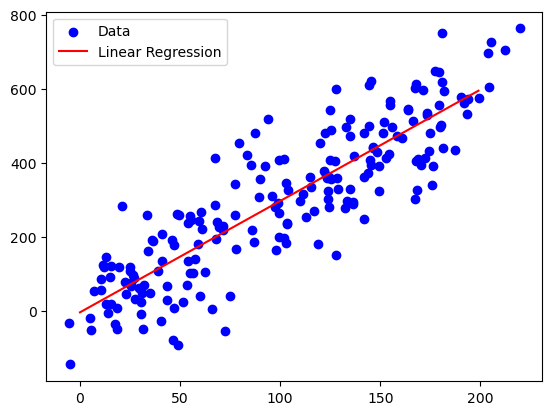

In [102]:
# Solve the least squares problem, get the weights, print them
w = leastSquares(xData, yData)
print(w)
#Predict y values for the data points
yPredicted = x_raw[:]*w[1] + w[0]
yDataPredicted = xData[:]*w[1] + w[0]

# Calculate the RMS error for the XData and YData
rmse = np.sqrt(np.sum(np.square(yDataPredicted - yData)))/yData.shape[0]
print('Testing Linear Regresion Mean Square Error:')
print('RMSE: ', rmse)
assert 6.87> rmse

#Plot the data and the linear regression result
plt.scatter(xData, yData, c='b', label='Data')
plt.plot(x_raw, yPredicted, 'r')
plt.legend(['Data','Linear Regression'])

Next problem is a Polynomial Regression problem.

# 1.2 Polynomial Regression 

Polynomial regression is an extension of linear regression designed to model more complex relationships between input features and the target variable. While linear regression assumes a straight-line relationship, polynomial regression introduces higher-degree terms to capture nonlinear patterns. Polynomials are widely used in situations where the response is curvilinear.

Suppose we have $P$ scalar input-output observation pairs:
<div style="text-align:center">
${ \{ (x_1,y_1), (x_1,y_2), ... ,(x_P, y_P) \} } $
</div>

The following model is a $d$-th order polynomial in one variable:
<div style="text-align:center">
$ y_p = b + w_1 x_1 + w_2 {x_p}^{2} + w_3 {x_p}^3 + ... + w_d {x_p}^d$
</div>

Similar to linear regression, one can fit the observation set to a polynomial model by using direct optimization with least squares method. Different from linear regression, one needs to create a special design matrix named Vandermonde matrix, $V$, for storing input values according to the polynomial expression. When $x_p$ is a scalar, we can construct $\mathbf{V}$ as follows:

<div style="text-align:center">
$ \mathbf{V} = \begin{bmatrix}
1 & x_1 & x_1^2 & \ldots & x_1^{d} \\
1 & x_2 & x_2^2 & \ldots & x_2^{d} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_P & x_P^2 & \ldots & x_P^{d}
\end{bmatrix} $
</div>
Suppose input is a 2 dimensional vector with independent features:

<div style="text-align:center">
$\mathbf{{x}_p} = \begin{bmatrix}
x_{1,p} \\
x_{2,p} \\
\end{bmatrix}$  
</div>

Then, the corresponding Vandermonde matrix is (for a degree $d$ polynomial model):

<div style="text-align:center">
$ \mathbf{V} = \begin{bmatrix}
1 & x_{1,1} & x_{2,1} & x_{1,1}^2 & x_{2,1}^2  & \ldots & x_{1,1}^{d} & x_{2,1}^{d} \\
1 & x_{1,2} & x_{2,2} & x_{1,2}^2  & x_{2,2}^2  & \ldots & x_{1,2}^{d} & x_{2,2}^{d} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots  & \vdots  \\
1 & x_{1,P} & x_{2,P} & x_{1,P}^2 & x_{2,P}^2  & \ldots & x_{1,P}^{d} & x_{2,P}^{d} \\
\end{bmatrix} $
</div>

Following the previous notations, the value of $\mathbf{\widetilde{w}}$ that minimizes the least squares cost is:

<div style="text-align:center">
$\mathbf{\widetilde{w}}^{*} = (\mathbf{V} \mathbf{V}^T)^{-1} \mathbf{V} \mathbf{y} $
</div>
Problem 1.2 requires to find solution (optimal regression weights $\mathbf{\widetilde{w}}^{*}$) to a polynomial regression problem by using least squares method as described above. This is a direct (analytical solution) optimization approach, where no iterations are required.

To provide your solution, please write your code in the designated space provided for the **leastSquares()** function in the **polynomialRegression.py** file. This function converts the polynomial regression problem into least squares problem and solves it analyticaly then returns with weights. You have been provided a data that has been generated from a second order polynomial. Please do not change anything related to your data. You may generate $\mathbf{V}$ matrix inside **leastSquares()** function. 

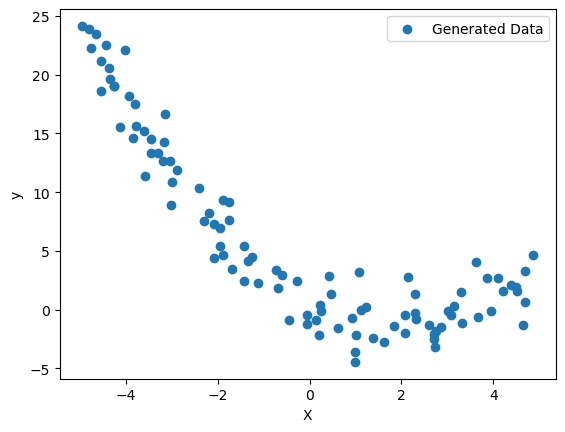

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from data_utils import generate_poly_data_q12

X, y = generate_poly_data_q12()

# Plot the generated data
plt.scatter(X, y, label='Generated Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

By using direct optimization (least squares), fit the data to polynomial models with degree ranging from 1 to 4. Inside the for loop, do the regression and print your coefficients. In a comment, discuss the different model fits and which you think best fits the data visually. 

Complete **polynomialRegression.py** file as instructed. Code up your solution in the designated space provided for the **leastSquares()**. Remember for using least squares method with polynomial regression you will need to construct Vandermonde matrix. (Your implementation should allow creating a matrix for multi input polynomial regressors.)

coefficients for degree: 1 [[ 5.35599099]
 [-2.22487213]]
coefficients for degree: 2 [[ 0.56269162]
 [-2.07959728]
 [ 0.5464851 ]]
coefficients for degree: 3 [[ 0.56875683]
 [-1.9691574 ]
 [ 0.545391  ]
 [-0.00735681]]
coefficients for degree: 4 [[ 0.33601461]
 [-1.95946348]
 [ 0.63393139]
 [-0.00792017]
 [-0.00413022]]


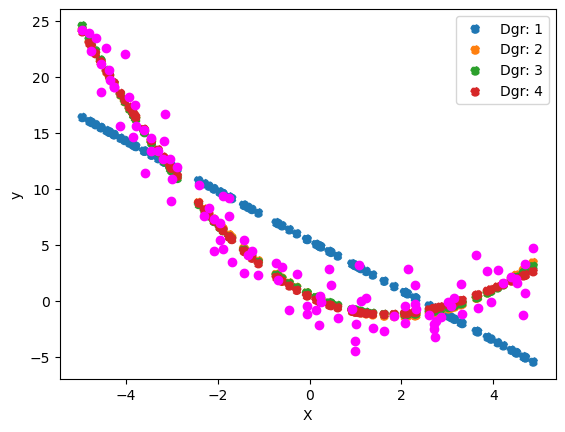

In [104]:
from polynomialRegression import leastSquares

degree = [1, 2, 3, 4]
color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Store w's in a list for the next part. 
w_polyfits = []

for idx, d in enumerate(degree):
    
    w, vandermonde = leastSquares(X, y, d)
    yPred = np.dot(vandermonde, w)
    
    # Storing weights for next part of the question.
    w_polyfits.append(w)
    
    print("coefficients for degree: " + str(d), w)
    plt.scatter(X, yPred, label='Dgr: ' + str(d), linestyle='dashed', color=color_list[idx])

# plot the data 
plt.scatter( X, y, marker="o",color="magenta")

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Gradient Descent Method 
In Problem set 2, you will implement gradient descent algorithm for multi-dimensional data, and report your results in comparison with direct least squares optimization. 

In both linearRegression.py and polynomialRegression.py modules, you need to implement the gradient descent algorithm. You should add your code to the designated blank space within the **gradient()** and **fit()** methods of the **gradientDescent()** classes, as indicated in the files. The **gradient()** methods should compute the gradient of the cost function for the given dataset and current weights, while the **fit()** method should update the weights iteratively until convergence is achieved. 

### Verify the correctness of your gradient descent algorithm:

Before beginning the problem set you may want to verify the correctness of your **gradientDescent()** class implementation under **linearRegression.py**. You may test your implementation using the next cell. These tests will help you to identify and fix any errors in your gradient descent algorithm.

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from linearRegression import gradientDescent, rel_error

np.random.seed(0)

# Set the learning rate and maximum number of iterations
lr = 0.1
max_iterations = 100

# Generate some sample data
xg = 2 * np.random.rand(100, 1)
yg = 4 + 3 * xg + np.random.randn(100, 1)

# Weight initialization
w = np.random.randn(xg.shape[1]+1,1)
a1 = gradientDescent(xg, yg, w, lr, max_iterations)

expected_gradient = np.array([[-8.68322829],
                             [-9.65481562]])

rer = rel_error(a1.gradient(),expected_gradient)

try:
    assert rer<1e-6
    print("Gradient is correct.")
    print("Releative error: ", rer)
    print("Gradient: ", a1.gradient())
except AssertionError:    
    print("Gradient calculation is not working correctly")
    print("Releative error: ", rer)
    print("Gradient: ", a1.gradient())
    assert rer<1e-6

student_w,_ = a1.fit(n_iterations=1)

expected_w = np.array([[ 0.51432892],
                        [-0.40946973]])
rer_w = rel_error(student_w,expected_w)

try:
    assert rer_w<1e-6
    print("Gradient descent is correct.")
    print("Releative error: ", rer_w)
    print("Gradient: ", np.array(student_w))
except AssertionError:
    print("Gradient descent is not working correctly")
    print("Releative error: ", rer_w)
    print("Gradient: ", np.array(student_w))    
    assert rer_w<1e-6

Gradient is correct.
Releative error:  2.7186464490922545e-10
Gradient:  [[-8.68322829]
 [-9.65481562]]
Gradient descent is correct.
Releative error:  1.7317237194841533e-09
Gradient:  [[ 0.51432892]
 [-0.40946973]]


The following code iterates the gradient descent algorithm (fit()) until convergence. 

!!! If the fit() function is not provided any arguments, it uses the previously defined learning rate and iterates until the maximum number of iterations or convergence is achieved.

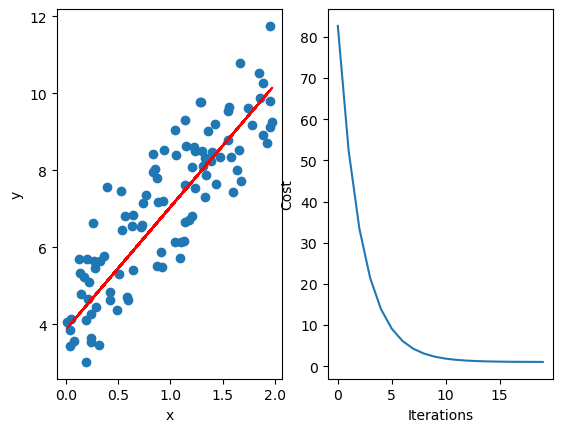

In [8]:
# Iterate gradient decet until convergence starting from the first step
a1.fit()
# Plot the data and the linear regression result
plt.subplot(1, 2, 1)
plt.scatter(xg, yg)
plt.plot(xg, a1.predict(a1.x), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1, 2, 2)
plt.plot(a1.cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')

plt.show()

If the fit() function is called with lr="diminishing" as an argument, the gradient descent algorithm updates the model parameters by computing the gradients at each iteration with a decreasing learning rate. The learning rate decreases over time (with formula $1/(k+1)$), which helps the algorithm to converge more efficiently to the optimal solution.

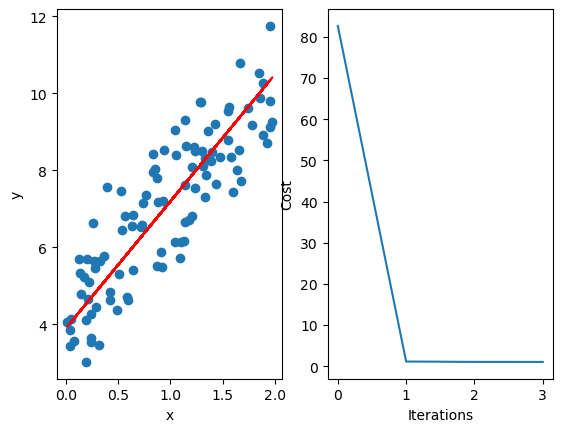

In [107]:
a2 = gradientDescent(xg, yg, w, lr, 20)
a2.fit("diminishing")
# Plot the data and the linear regression result
plt.subplot(1, 2, 1)
plt.scatter(xg, yg)
plt.plot(xg, a2.predict(a2.x), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1, 2, 2)
plt.plot(a2.cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

### Train with various hyperparameters

Learning rate and weight initialization affects the convergence of Gradient Descent algorithm. You will need to implement parameter search for problem 2. You may use the following codes to find best hyperparameters.

### Searching for the learning rate

There is a list of learning rates to be used in a test loop, and you are going to fit a line to the given data ($xg,yg$) using these **lr** and plot their respective cost history.

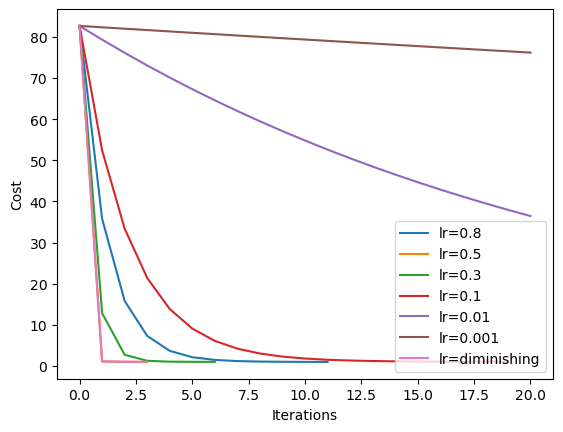

In [108]:
learning_rates = [0.8, .5, .3, .1, .01, .001, "diminishing"]

# Fit line and plot learning process for different learning rate
for ilr in learning_rates:
    a3 = gradientDescent(xg, yg, w, lr, max_iterations)
    a3.fit(ilr,20)
    plt.plot(a3.cost_history, label=ilr)

plt.legend(['lr=0.8','lr=0.5','lr=0.3','lr=0.1','lr=0.01','lr=0.001','lr=diminishing'])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

### Searching for weight initialization 

We will test weights with a constant learning rate of 0.5 that we found in the previous section, as it has a faster convergence rate.

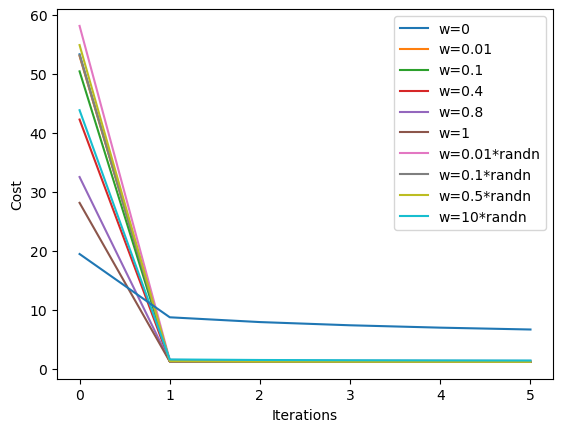

In [109]:
np.random.seed(1005)
weights = np.zeros((11, w.shape[0], w.shape[1]))
weights[1,:,:] = 0.01*np.ones((xg.shape[1]+1,1))
weights[2,:,:] = 0.1*np.ones((xg.shape[1]+1,1))
weights[3,:,:] = 0.4*np.ones((xg.shape[1]+1,1))
weights[4,:,:] = 0.8*np.ones((xg.shape[1]+1,1))
weights[5,:,:] = np.ones((xg.shape[1]+1,1))
weights[6,:,:]= np.random.randn(xg.shape[1]+1,1)
weights[7,:,:] = 0.01*np.random.randn(xg.shape[1]+1,1)
weights[8,:,:] = 0.1*np.random.randn(xg.shape[1]+1,1)
weights[9,:,:] = 0.5*np.random.randn(xg.shape[1]+1,1)
weights[10,:,:] = 10*np.random.randn(xg.shape[1]+1,1)

# Fit line and plot learning process for different weight initialization for lr=.5
lr = 0.5
for iw in weights:
    a4 = gradientDescent(xg, yg, iw, lr, 10)
    a4.fit("diminishing",5)
    plt.plot(a4.cost_history, label=lr)
plt.legend(["w=0", "w=0.01", "w=0.1", "w=0.4", "w=0.8", "w=1", "w=0.01*randn", "w=0.1*randn", "w=0.5*randn", "w=10*randn"])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# 2. Linear and Polynomial Regressions with Least Squares and Gradient Descent methods

Now, you may start solving Problem Set 2. Here, your task is to identify linear or polynomial regression weights by using:


1) Least Squares method
2) Gradient descent method

And compare the solutions.

For gradient descent hyperparameter optimization, you need to find the optimal hyperparameters, including the learning rate and initial weights, to fit a line to the data. First, find the best learning rate by trying various  learnin rate values. After that, you can proceed to find the optimal weight initialization. Once you have identified all the optimal hyperparameters, you can then fit a line to the entire dataset with the optimal values. During the process of parameter tuning and fitting the line, plot cost functions and put legend on it as you are shown beforehand. (For gradient descent, there should be 3 cost plots.)

Print the weight vectors you found by using two methods.

# 2.1 Linear Regression with Least Squares and Gradient Descent

You have been provided with a dataset **(Q2_1.npy)** consisting of four dimensions as features and one dimension for regression. You are expected to complete the following tasks:

1) Find optimal weights $\mathbf{\widetilde{w}}^{*}$ by using least squares. 

2) Find optimal weights $\mathbf{\widetilde{w}}^{*}$ by using gradient descent. Explore how the choice of learning rate and weight initializations in gradient descent affects the convergence and final weights. Are there learning rates/weight initializations that result in divergence or slow convergence? You may change the search space provided to you as you want.

3) Print and compare the weight vectors obtained by least squares and gradient descent methods. How close are the values in each dimension?


In [9]:
import numpy as np

with open('Q2_1.npy', 'rb') as f:
    X = np.load(f)
    y = np.load(f)

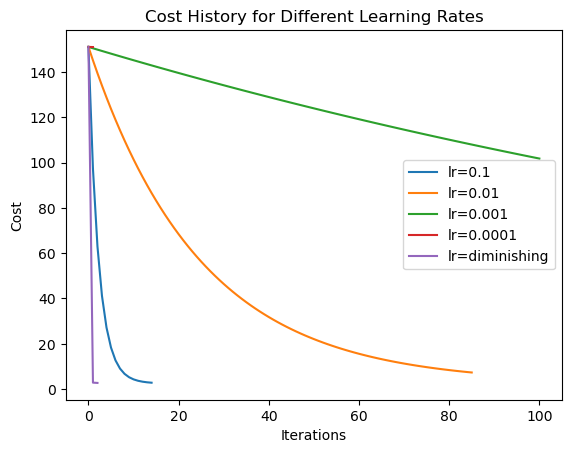

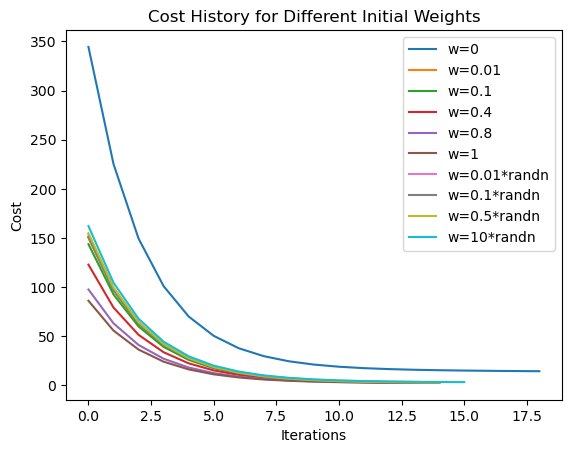

Least Squares: 
 [[1.30034577]
 [4.00064428]
 [5.99967453]
 [2.99930208]
 [8.29946174]] 
Gradient Descent: 
 [[13.87380239]
 [-6.28873788]
 [-0.10297888]
 [-1.34584884]
 [ 4.07783455]]
Relative error:  1.0
MSE using gradient descent:  14.450016349865665
MSE using least squares:  0.00011064371000902262
The MSE values show that the least squares approach gives 
 more precise results.


In [12]:
##############################################################################
# TODO: Do all your least squares tasks here                              #
# Plot all cost history for different learning rates and different           #
# initial weights.                                                           #
##############################################################################
from linearRegression import leastSquares, gradientDescent

# find the optimal regression weights by using least squares
least_squares_w = leastSquares(X, y)

##############################################################################

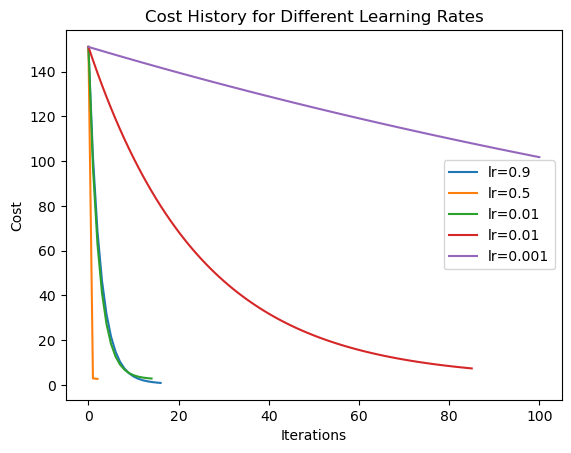

Best learning rate:  0.9
It is clear from the figure above that the cost curves generated 
 using a learning rate less than 5e-3 converges to zero slower (slow convergence),
 and learning rates bigger than 1.005e-2 causes to cost curves to diverge (overshoot).


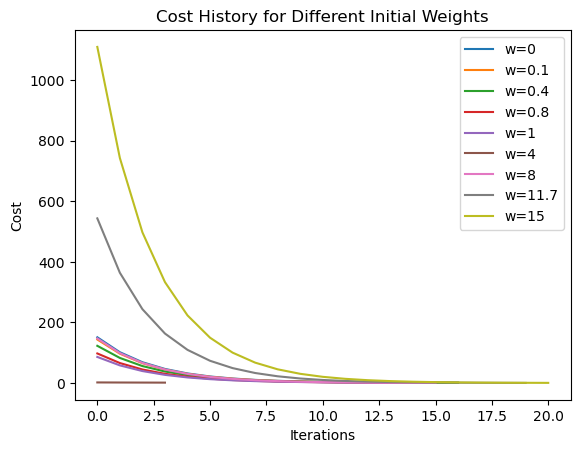

Best initial weights: 
 [[11.7]
 [11.7]
 [11.7]
 [11.7]
 [11.7]]
Initial weights that are smaller than 0.4 converge to zero slower. 
 Values that are larger than 0.4 converges faster at first couple iterations, 
 but stay behind of 0.4 in the long run.

Optimum weights calculated by different optimization methods are shown below: 
Least Squares: 
 [[1.30034577]
 [4.00064428]
 [5.99967453]
 [2.99930208]
 [8.29946174]] 
Gradient Descent: 
 [[0.554739  ]
 [4.4126721 ]
 [5.94670407]
 [3.62595694]
 [7.76216672]]
Relative error:  0.4019259864026767
MSE using gradient descent:  0.35065074599509505
MSE using least squares:  0.00011064371000902262
The MSE values show that the least squares approach gives 
 more precise results.


In [30]:
##############################################################################
# TODO: Do all your parameter search tasks here                              #
# Plot all cost history for different learning rates and different           #
# initial weights.                                                           #
##############################################################################

# find the optimal regression weights by using gradient descent
# learning rates to be used
max_iterations = 100
best_lr = 0
best_w = 0

learning_rates = [0.9, 0.5, 0.1, 0.01, 0.001]
# initial weights to be used
weights = np.zeros((9, X.shape[1] + 1, 1))
weights[1,:,:] = 0.1*np.ones((X.shape[1]+1,1))
weights[2,:,:] = 0.4*np.ones((X.shape[1]+1,1))
weights[3,:,:] = 0.8*np.ones((X.shape[1]+1,1))
weights[4,:,:] = np.ones((X.shape[1]+1,1))
weights[5,:,:] = 4*np.ones((X.shape[1]+1,1))
weights[6,:,:] = 8*np.ones((X.shape[1]+1,1))
weights[7,:,:] = 11.7*np.ones((X.shape[1]+1,1))
weights[8,:,:] = 15*np.ones((X.shape[1]+1,1))

min_cost = 1e300
for lr in learning_rates:
    gd = gradientDescent(X, y, weights[0], lr, max_iterations)
    gd.fit(lr, max_iterations)
    if gd.cost_history[-1] < min_cost:
        min_cost = gd.cost_history[-1]
        best_lr = lr
    plt.plot(gd.cost_history, label=lr)

plt.title('Cost History for Different Learning Rates')
plt.legend(['lr=0.9', 'lr=0.5', 'lr=0.01', 'lr=0.01', 'lr=0.001'])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

print("Best learning rate: ", best_lr)
print("It is clear from the figure above that the cost curves generated \n", 
      "using a learning rate less than 5e-3 converges to zero slower (slow convergence),\n", 
      "and learning rates bigger than 1.005e-2 causes to cost curves to diverge (overshoot).")

min_cost = 1e300
for w in weights:
    gd = gradientDescent(X, y, w, best_lr, max_iterations)
    gd.fit(best_lr, max_iterations)
    if gd.cost_history[-1] < min_cost:
        min_cost = gd.cost_history[-1]
        best_w = w
    plt.plot(gd.cost_history, label=w)

plt.title('Cost History for Different Initial Weights')
plt.legend(["w=0", "w=0.1", "w=0.4", "w=0.8", "w=1", "w=4", "w=8", "w=11.7", "w=15"])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

print("Best initial weights: \n", str(best_w))
print("Initial weights that are smaller than 0.4 converge to zero slower. \n",
      "Values that are larger than 0.4 converges faster at first couple iterations, \n",
      "but stay behind of 0.4 in the long run.\n")

ultimate_gd = gradientDescent(X, y, best_w, best_lr, max_iterations)
ultimate_gd.fit(best_lr, max_iterations)
print("Optimum weights calculated by different optimization methods are shown below: ")
print("Least Squares: \n",least_squares_w,"\nGradient Descent: \n", ultimate_gd.w)

from linearRegression import rel_error

print("Relative error: ", rel_error(least_squares_w, ultimate_gd.w))
print("MSE using gradient descent: ", ultimate_gd.cost())
ultimate_gd.w = least_squares_w
print("MSE using least squares: ", ultimate_gd.cost())
print("The MSE values show that the least squares approach gives \n",
      "more precise results.")

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

# 2.2 Polynomial Regression with Least Squares and Gradient Descent

You have been provided with a dataset **(Q2_2.npy)** consisting of two dimensions as features and one dimension for regression. This data has a relationship that can be modeled with a polynomial. After generating the corresponding Vandermonde matrix for the problem, you are expected to fit a $2$nd order polynomial model to this data by completing the following tasks:

1) Find optimal weights $\mathbf{\widetilde{w}}^{*}$ by using least squares. 

2) Find optimal weights $\mathbf{\widetilde{w}}^{*}$ by using gradient descent. Explore how the choice of learning rate and weight initializations in gradient descent affects the convergence and final weights. Are there learning rates/weight initializations that result in divergence or slow convergence? You may change the search space provided to you as you want.

3) Print and compare the weight vectors obtained by least squares and gradient descent methods. How close are the values in each dimension?

Note: Vandermonde matrix definition for a degree $2$ polynomial is:
<div style="text-align:center">
$ \mathbf{V} = \begin{bmatrix}
1 & x_{1,1} & x_{2,1} & x_{1,1}^2 & x_{2,1}^2   \\
1 & x_{1,2} & x_{2,2} & x_{1,2}^2  & x_{2,2}^2  \\
\vdots & \vdots & \vdots & \vdots & \vdots   \\
1 & x_{1,P} & x_{2,P} & x_{1,P}^2 & x_{2,P}^2  \\
\end{bmatrix} $
</div>

You may create $\mathbf{V}$ matrix before creating a **gradientDescent()** instance, and provide $\mathbf{V}$ matrix as input to **gradientDescent()** class. 

In [113]:
import numpy as np

with open('Q2_2.npy', 'rb') as f:
    X = np.load(f)
    y = np.load(f)

In [114]:
##############################################################################
# TODO: Do all your least squares tasks here                                 #
#                                                                            #
#                                                                            #
##############################################################################

from polynomialRegression import leastSquares, gradientDescent

# find the optimal regression weights by using least squares
least_squares_w, vandermonde = leastSquares(X, y, 2)

(2000, 5)


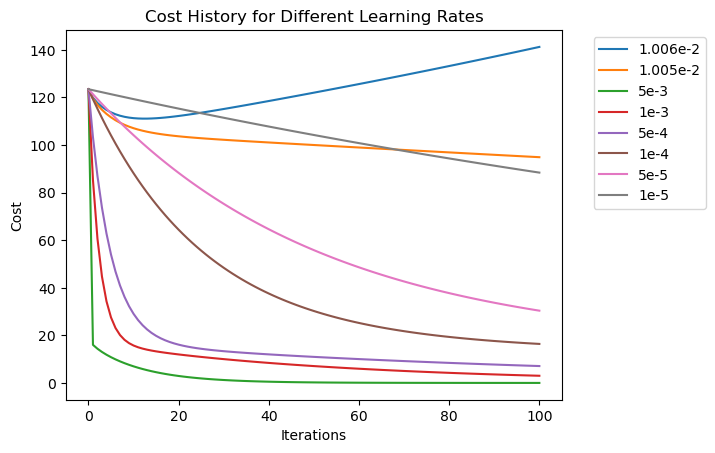

Best learning rate:  0.005
It is clear from the figure above that the cost curves generated 
 using a learning rate less than 5e-3 converges to zero slower (slow convergence),
 and learning rates bigger than 1.005e-2 causes to cost curves to diverge (overshoot).


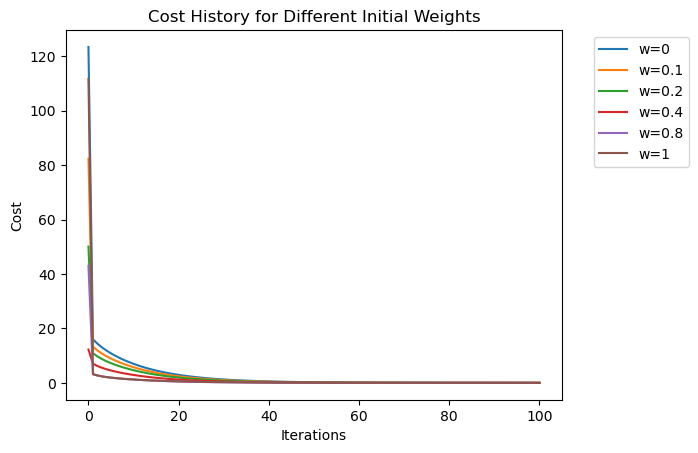

Best initial weights: 
 [[0.4]
 [0.4]
 [0.4]
 [0.4]
 [0.4]]
Initial weights that are smaller than 0.4 converge to zero slower. 
 Values that are larger than 0.4 converges faster at first couple iterations, 
 but stay behind of 0.4 in the long run.

Optimum weights calculated by different optimization methods are shown below: 
Least Squares: 
 [[0.49983325]
 [1.29991311]
 [0.50003965]
 [0.40000779]
 [0.59998986]] 
Gradient Descent: 
 [[0.42254919]
 [1.28858424]
 [0.49901668]
 [0.40323814]
 [0.60329423]]


In [115]:
##############################################################################
# TODO: Do all your parameter search tasks here                              #
# Plot all cost history for different learning rates and different           #
# initial weights.                                                           #
##############################################################################

# find the optimal regression weights by using gradient descent
# learning rates to be useds
max_iterations = 100
best_lr = 0
best_w = 0

learning_rates = [1.006e-2, 1.005e-2, 5e-3, 1e-3, 5e-4, 1e-4, 5e-5, 1e-5]
# initial weights to be used
weights = np.zeros((6, vandermonde.shape[1], 1))
weights[1,:,:] = 0.1*np.ones((vandermonde.shape[1],1))
weights[2,:,:] = 0.2*np.ones((vandermonde.shape[1],1))
weights[3,:,:] = 0.4*np.ones((vandermonde.shape[1],1))
weights[4,:,:] = 0.8*np.ones((vandermonde.shape[1],1))
weights[5,:,:] = np.ones((vandermonde.shape[1],1))

min_cost = 1e300
for lr in learning_rates:
    gd = gradientDescent(vandermonde, y, weights[0], lr, max_iterations)
    gd.fit(lr, max_iterations)
    if gd.cost_history[-1] < min_cost:
        min_cost = gd.cost_history[-1]
        best_lr = lr
    plt.plot(gd.cost_history, label=lr)

plt.title('Cost History for Different Learning Rates')
plt.legend(['1.006e-2', '1.005e-2', '5e-3', '1e-3', '5e-4', '1e-4', '5e-5', '1e-5'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

print("Best learning rate: ", best_lr)
print("It is clear from the figure above that the cost curves generated \n", 
      "using a learning rate less than 5e-3 converges to zero slower (slow convergence),\n", 
      "and learning rates bigger than 1.005e-2 causes to cost curves to diverge (overshoot).")

min_cost = 1e300
for w in weights:
    gd = gradientDescent(vandermonde, y, w, best_lr, max_iterations)
    gd.fit(best_lr, max_iterations)
    if gd.cost_history[-1] < min_cost:
        min_cost = gd.cost_history[-1]
        best_w = w
    plt.plot(gd.cost_history, label=w)

plt.title('Cost History for Different Initial Weights')
plt.legend(["w=0", "w=0.1", "w=0.2", "w=0.4", "w=0.8", "w=1"], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

print("Best initial weights: \n", str(best_w))
print("Initial weights that are smaller than 0.4 converge to zero slower. \n",
      "Values that are larger than 0.4 converges faster at first couple iterations, \n",
      "but stay behind of 0.4 in the long run.\n")

ultimate_gd = gradientDescent(vandermonde, y, best_w, best_lr, max_iterations)
ultimate_gd.fit(best_lr, max_iterations)
print("Optimum weights calculated by different optimization methods are shown below: ")
print("Least Squares: \n",least_squares_w,"\nGradient Descent: \n", ultimate_gd.w)

from polynomialRegression import rel_error

print("Relative error: ", rel_error(least_squares_w, ultimate_gd.w))
print("MSE using gradient descent: ", ultimate_gd.cost())
ultimate_gd.w = least_squares_w
print("MSE using least squares: ", ultimate_gd.cost())
print("The MSE values show that the least squares approach gives \n",
      "more precise results.")

##############################################################################

# 2.3 Polynomial Regression with Dependent Weights

In many real world data weights are not independent and there can be correlations or interactions between them. 

Suppose a polynomial regression equation is defined:
<div style="text-align:center">
$ y_p = b + w_1 {x_{p}} + (w_1 + b){x_{p}}^{2} + \epsilon $
</div>
Then, $V$ matrix of this polynomial model is constructed as:
<div style="text-align:center">
$ \mathbf{V} = \begin{bmatrix}
1 + x_{1}^2 & x_{1} + x_{1}^2 \\
1 + x_{2}^2 & x_{2} + x_{2}^2 \\
\vdots & \vdots \\
1 + x_{P}^2 & x_{P} + x_{P}^2 \\
\end{bmatrix} 
$
</div>

Where the associated weight vector is:

<div style="text-align:center">
$\mathbf{\widetilde{w}} = \begin{bmatrix}
b \\
w_1 \\
\end{bmatrix}$  

</div> 

You have been provided with a dataset **(Q2_3.npy)** consisting of scalar input/output for regression. This model has a dependency among its weights. You are expected to fit your data to the polynomial model below:
<div style="text-align:center">
$ y_p = b + w_1 {x_{p}} + (w_1 + b){x_{p}}^{2} + \epsilon $
</div>
Generate the $V$ matrix accordingly and,

1) Find optimal weight vector $\mathbf{\widetilde{w}}^{*}$ by using least squares. 

2) Find optimal weight vector $\mathbf{\widetilde{w}}^{*}$ by using gradient descent. Explore how the choice of learning rate and weight initializations in gradient descent affects the convergence and final weights. Are there learning rates/weight initializations that result in divergence or slow convergence? You may change the search space provided to if necessary.

3) Print and compare the weight vectors obtained by least squares and gradient descent methods. How close are the values in each dimension?

In [120]:
with open('Q2_3.npy', 'rb') as f:
    X = np.load(f)
    y = np.load(f)

In [125]:
##############################################################################
# TODO: Do all your least squares tasks here                                 #
#                                                                            #
#                                                                            #
##############################################################################

from polynomialRegression import leastSquares, gradientDescent

vandermonde = np.ones((X.shape[0], 0))

vandermonde = np.concatenate((vandermonde, 1 + X), axis=1)
vandermonde = np.concatenate((vandermonde, X + X**2), axis=1)

least_squares_w = np.linalg.inv(vandermonde.T @ vandermonde) @ vandermonde.T @ y

[[-0.25459881  0.31941937]
 [ 5.50714306 24.82148166]
 [ 3.31993942  7.70205832]
 ...
 [-3.31041984 14.26929933]
 [-3.42945279 15.19059922]
 [-1.17812925  2.56611779]]


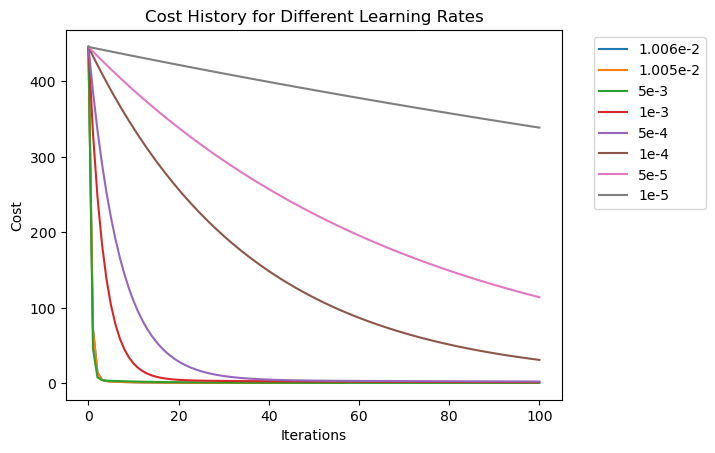

Best learning rate:  0.01006
It is clear from the figure above that the cost curves generated 
 using a learning rate less than 5e-3 converges to zero slower (slow convergence),
 and learning rates bigger than 1.005e-2 causes to cost curves to diverge (overshoot).


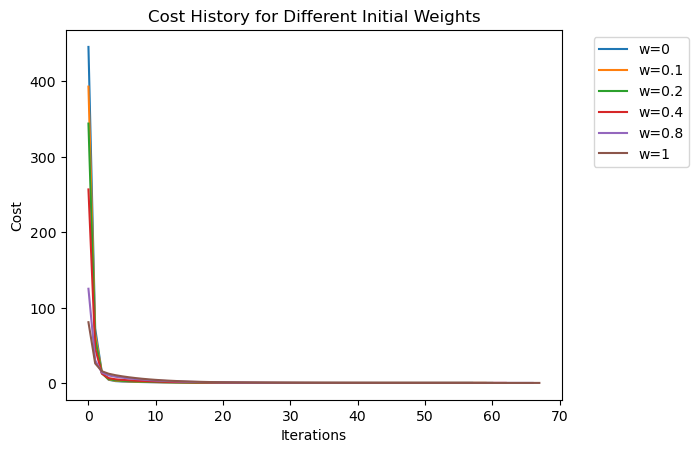

Best initial weights: 
 [[0.1]
 [0.1]]
Initial weights that are smaller than 0.4 converge to zero slower. 
 Values that are larger than 0.4 converges faster at first couple iterations, 
 but stay behind of 0.4 in the long run.

Optimum weights calculated by different optimization methods are shown below: 
Least Squares: 
 [[8.9065409 ]
 [1.27809957]
 [0.4497714 ]] 
Gradient Descent: 
 [[-0.49653196]
 [ 1.86195666]]


In [123]:
##############################################################################
# TODO: Do all your parameter search tasks here                              #
# Plot all cost history for different learning rates and different           #
# initial weights.                                                           #
##############################################################################

# find the optimal regression weights by using gradient descent
# learning rates to be useds
max_iterations = 100
best_lr = 0
best_w = 0



learning_rates = [1.444e-2, 1.443e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4, 5e-5, 1e-5]
# initial weights to be used
weights = np.zeros((6, V.shape[1], 1))
weights[1,:,:] = 0.1*np.ones((V.shape[1],1))
weights[2,:,:] = 0.2*np.ones((V.shape[1],1))
weights[3,:,:] = 0.4*np.ones((V.shape[1],1))
weights[4,:,:] = 0.8*np.ones((V.shape[1],1))
weights[5,:,:] = np.ones((V.shape[1],1))

min_cost = 1e300
for lr in learning_rates:
    gd = gradientDescent(V, y, weights[0], lr, max_iterations)
    gd.fit(lr, max_iterations)
    if gd.cost_history[-1] < min_cost:
        min_cost = gd.cost_history[-1]
        best_lr = lr
    plt.plot(gd.cost_history, label=lr)

plt.title('Cost History for Different Learning Rates')
plt.legend(['1.444e-2', '1.443e-2', '1e-2', '5e-3', '1e-3', '5e-4', '1e-4', '5e-5', '1e-5'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

print("Best learning rate: ", best_lr)
print("It is clear from the figure above that the cost curves generated \n", 
      "using a learning rate less than 1e-2 converges to zero slower (slow convergence),\n", 
      "and learning rates bigger than 1.443e-2 causes to cost curves to diverge (overshoot).")

min_cost = 1e300
for w in weights:
    gd = gradientDescent(V, y, w, best_lr, max_iterations)
    gd.fit(best_lr, max_iterations)
    if gd.cost_history[-1] < min_cost:
        min_cost = gd.cost_history[-1]
        best_w = w
    plt.plot(gd.cost_history, label=w)

plt.title('Cost History for Different Initial Weights')
plt.legend(["w=0", "w=0.1", "w=0.2", "w=0.4", "w=0.8", "w=1"], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

print("Best initial weights: \n", str(best_w))
print("Initial weights that are smaller than 0.4 converge to zero slower. \n",
      "Values that are larger than 0.4 converges faster at first couple iterations, \n",
      "but stay behind of 0.4 in the long run.\n")

ultimate_gd = gradientDescent(V, y, best_w, best_lr, max_iterations)
ultimate_gd.fit(best_lr, max_iterations)
print("Optimum weights calculated by different optimization methods are shown below: ")
print("Least Squares: \n",least_squares_w,"\nGradient Descent: \n", ultimate_gd.w)

from polynomialRegression import rel_error

print("Relative error: ", rel_error(least_squares_w, ultimate_gd.w))
print("MSE using gradient descent: ", ultimate_gd.cost())
ultimate_gd.w = least_squares_w
print("MSE using least squares: ", ultimate_gd.cost())
print("The MSE values show that the least squares approach gives \n",
      "more precise results.")

##############################################################################